# Credit Card Fraud Detection

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

### Data Preprocessing

In [43]:
df = pd.read_csv('card_data.csv')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.shape

(1000000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Exploratory Data Analysis

In [37]:
df['fraud'] = df['fraud'].replace([0.0, 1.0], ['Not Fraudulent', 'Fraudulent'])

In [10]:
df.groupby('fraud')['distance_from_home'].mean()

fraud
Fraudulent        66.261876
Not Fraudulent    22.832976
Name: distance_from_home, dtype: float64

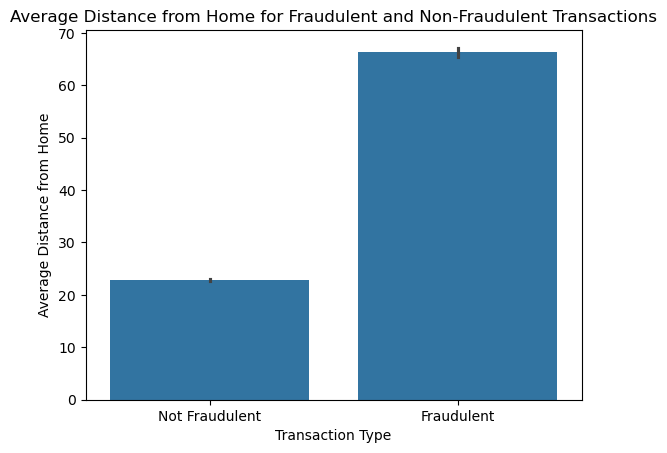

In [11]:
sns.barplot(x = 'fraud', y = 'distance_from_home', data = df)
plt.title('Average Distance from Home for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Average Distance from Home')
plt.show()

In [12]:
df.groupby('fraud')['ratio_to_median_purchase_price'].mean()

fraud
Fraudulent        6.006323
Not Fraudulent    1.423642
Name: ratio_to_median_purchase_price, dtype: float64

In [13]:
df.groupby('fraud')['ratio_to_median_purchase_price'].size()

fraud
Fraudulent         87403
Not Fraudulent    912597
Name: ratio_to_median_purchase_price, dtype: int64

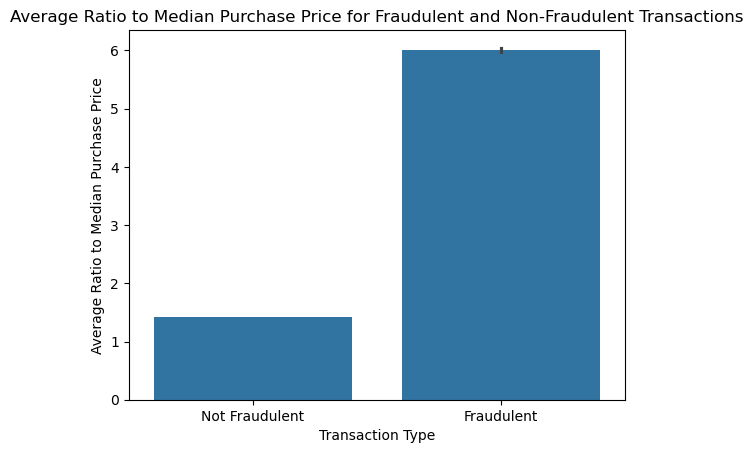

In [14]:
sns.barplot(x = 'fraud', y = 'ratio_to_median_purchase_price', data = df)
plt.title('Average Ratio to Median Purchase Price for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Average Ratio to Median Purchase Price')
plt.show()

In [38]:
df['online_order'] = df['online_order'].replace([0.0, 1.0], ['Not Online', 'Online'])

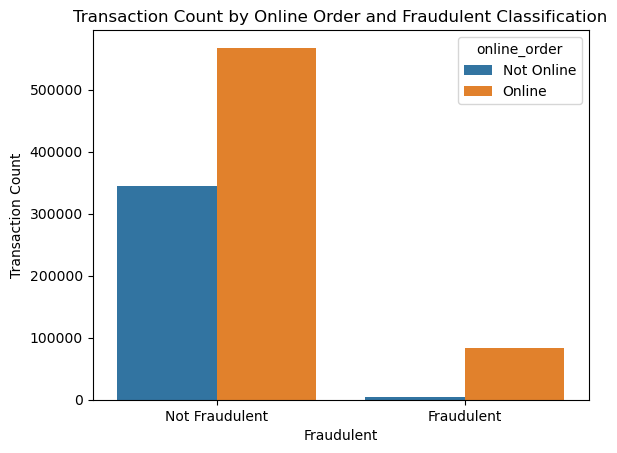

In [18]:
sns.countplot(x='fraud', hue='online_order', data=df)
plt.title('Transaction Count by Online Order and Fraudulent Classification')
plt.xlabel('Fraudulent')
plt.ylabel('Transaction Count')
plt.show()

In [40]:
df['fraud'] = df['fraud'].replace(['Not Fraudulent', 'Fradulent'], [0.0, 1.0])
df['online_order'] = df['online_order'].replace(['Not Online', 'Online'], [0.0, 1.0])

In [44]:
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


### Model Building

In [45]:
X = df[['distance_from_home', 'ratio_to_median_purchase_price', 'online_order']].values
y = df['fraud'].values

In [46]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_hat_LR = LR.predict(X_test)
LR_accuracy = accuracy_score(y_test, y_hat_LR)
print('Logistic Regression Model Accuracy:', round(LR_accuracy, 3))

Logistic Regression Model Accuracy: 0.943


In [52]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_hat_KNN = KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test, y_hat_KNN)
print('K-Nearest Neighbors Model Accuracy:', round(KNN_accuracy, 3))

K-Nearest Neighbors Model Accuracy: 0.971


In [53]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_hat_DT = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_hat_DT)
print('Decision Tree Model Accuracy:', round(DT_accuracy, 3))

Decision Tree Model Accuracy: 0.96


In [54]:
RF = RandomForestClassifier(n_estimators = 10)
RF.fit(X_train, y_train)
y_hat_RF = RF.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_hat_RF)
print('Random Forest Model Accuracy:', round(RF_accuracy, 3))

Random Forest Model Accuracy: 0.969
